In [1]:
import os
import pandas as pd

color_dir = '/Users/nickeastham/PlantVillage-Dataset/raw/color'  
dir = os.listdir(color_dir)
df = pd.DataFrame()

photo_array = []
condition_array = []
disease_array = []
type_of_plant_array = []

for file in dir:
    if file != ".DS_Store":
        dir_photos = os.listdir(os.path.join(color_dir, file))
        
        if "healthy" in file:
            condition = 1
            diseased = "healthy"
        else: 
            condition = 0
            diseased = file.split("___")[1]

        type_of_plant = file.split("___")[0]
        
        for photo in dir_photos:
           condition_array.append(condition)
           disease_array.append(diseased)
           photo_array.append(photo)
           type_of_plant_array.append(type_of_plant)

df['Photo'] = photo_array
df['Disease'] = disease_array
df['Type of Plant'] = type_of_plant_array
df['Condition'] = condition_array

df

,Photo,Disease,Type of Plant,Condition
0,8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1...,healthy,Strawberry,1
1,b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4...,healthy,Strawberry,1
2,abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1...,healthy,Strawberry,1
3,d1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2...,healthy,Strawberry,1
4,3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1...,healthy,Strawberry,1
...,...,...,...,...
54300,57c18b39-2a33-471f-91eb-a9ba4ddabc7b___RS_HL 6...,healthy,Soybean,1
54301,4fdc663e-a8ea-4d8a-801b-ef18ad192661___RS_HL 6...,healthy,Soybean,1
54302,df807f13-078b-4a6a-9c23-e43e540ecdc2___RS_HL 5...,healthy,Soybean,1
54303,60bf9858-951a-4b56-906e-3c1b336973ba___RS_HL 4...,healthy,Soybean,1


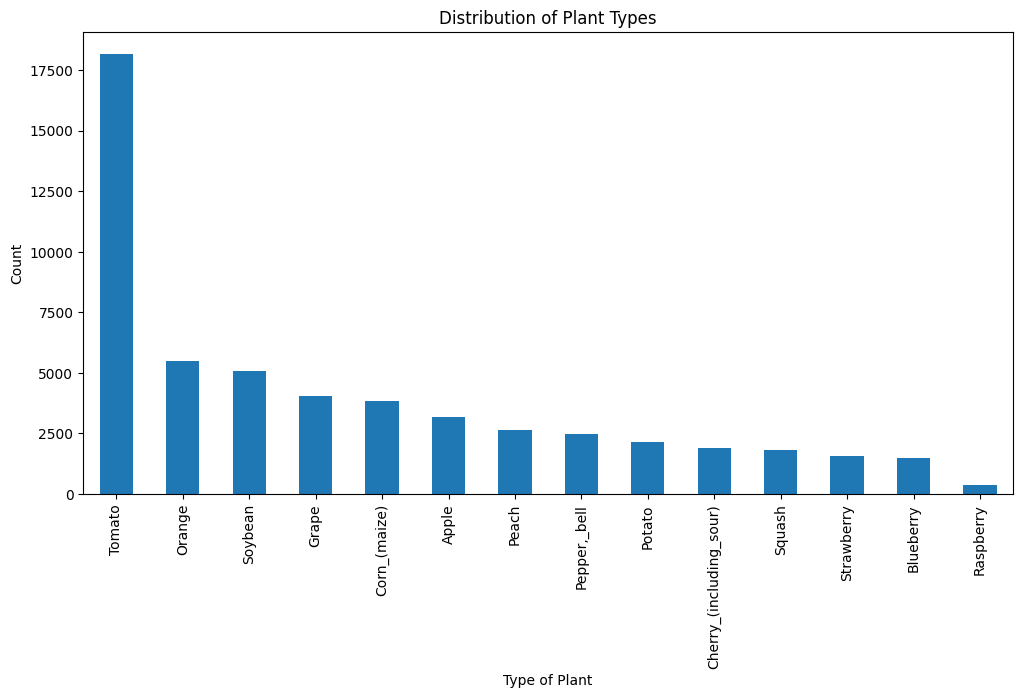

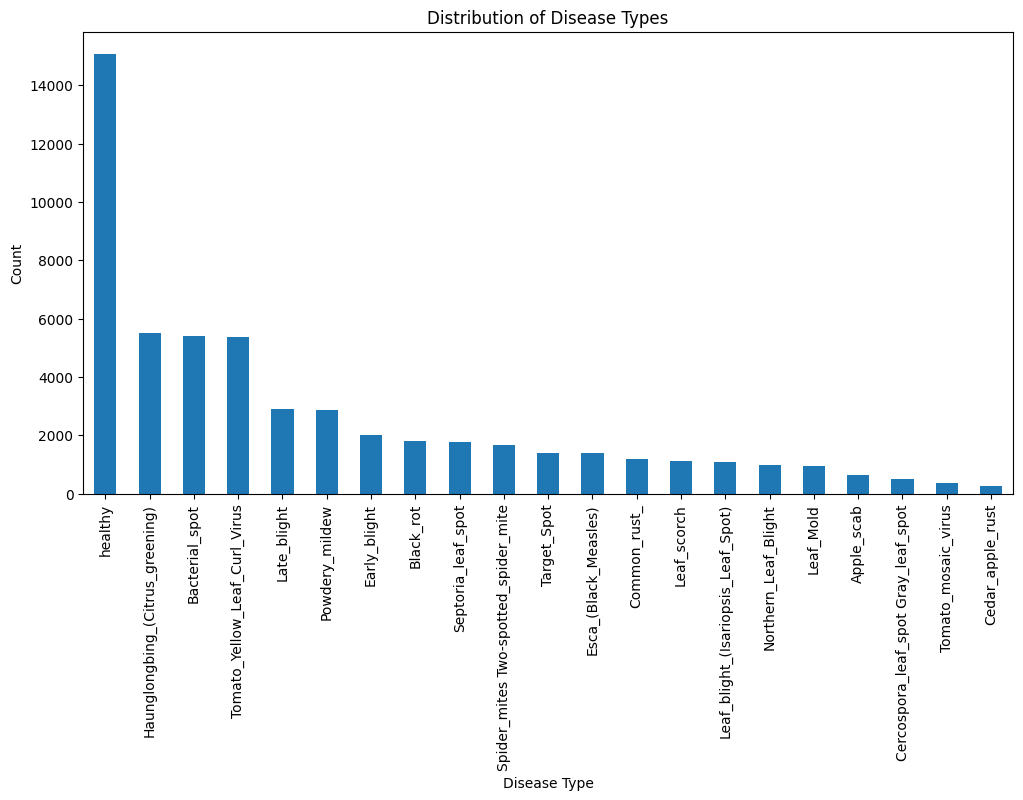

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['Type of Plant'].value_counts().plot(kind='bar')
plt.title('Distribution of Plant Types')
plt.xlabel('Type of Plant')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Distribution of Disease Types')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()

In [3]:
import os
from PIL import Image

directory_path = '/Users/nickeastham/PlantVillage-Dataset/raw/color'

non_256_count = 0

def process_directory(directory, count):
    global non_256_count
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.jpg')):
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    if width != 256 or height != 256:
                        non_256_count += 1
            except IOError:
                print(f"Error opening {filename}.")
        elif os.path.isdir(file_path):
            process_directory(file_path, count)

process_directory(directory_path, non_256_count)

print(f"Number of images with non-256 dimensions: {non_256_count}")

Number of images with non-256 dimensions: 0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

color_dir = '/Users/nickeastham/PlantVillage-Dataset/raw/color'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    color_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    color_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

class_indices = train_generator.class_indices

print("--Class--")
for class_name, index in class_indices.items():
    print(f"{class_name}")

2023-11-12 20:45:14.638597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
--Class--
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tom

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [6]:
#history = model.fit(
#    train_generator,
#    steps_per_epoch=train_generator.samples // train_generator.batch_size,
#    epochs=2,
#    validation_data=validation_generator,
#    validation_steps=validation_generator.samples // validation_generator.batch_size
#)

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  
plt.legend(loc='lower right')
plt.show()

NameError: name 'history' is not defined